## User Overview Analysis

For the actual telecom dataset conduct a full User Overview analysis & the following sub-tasks: 
<ol>
    <li>Identifying the top 10 handsets used by the customers.</li>
    <li>Identify the top 3 handset manufacturers</li>
    <li>Identify the top 5 handsets per top 3 handset manufacturer</li>
    <li>Interpretation and recommendation to marketing teams</li>
</ol>

In [36]:
# Load Libraries and Data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

###  Load The data from Database

In [37]:
df_clean = pd.read_csv('../data/clean_data.csv')

In [38]:
df_clean.head()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Start,End,Last Location Name,Handset Manufacturer,Handset Type
0,1.311448e+19,770.0,662.0,104608.43895,2.082014e+14,3.366496e+10,3.552121e+13,42.0,5.0,23.0,...,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,4/4/2019 12:01,4/25/2019 14:35,9.16456699548519E+015,Samsung,Samsung Galaxy A5 Sm-A520F
1,1.311448e+19,235.0,606.0,104608.43895,2.082019e+14,3.368185e+10,3.579401e+13,65.0,5.0,16.0,...,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,4/9/2019 13:04,4/25/2019 8:15,L77566A,Samsung,Samsung Galaxy J5 (Sm-J530)
2,1.311448e+19,1.0,652.0,104608.43895,2.082003e+14,3.376063e+10,3.528151e+13,45.0,5.0,6.0,...,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,4/9/2019 17:42,4/25/2019 11:58,D42335A,Samsung,Samsung Galaxy A8 (2018)
3,1.311448e+19,486.0,171.0,104608.43895,2.082014e+14,3.375034e+10,3.535661e+13,45.0,5.0,44.0,...,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,4/10/2019 0:31,4/25/2019 7:36,T21824A,undefined,undefined
4,1.311448e+19,565.0,954.0,104608.43895,2.082014e+14,3.369980e+10,3.540701e+13,45.0,5.0,6.0,...,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,4/12/2019 20:10,4/25/2019 10:40,D88865A,Samsung,Samsung Sm-G390F


In [39]:
# stastical discription of the dataset
df_clean.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.488370e+05,148837.000000,148837.000000,148837.000000,1.488370e+05,1.488370e+05,1.488370e+05,148837.000000,148837.000000,148837.000000,...,1.488370e+05,1.488370e+05,1.488370e+05,1.488370e+05,1.488370e+05,1.488370e+05,1.488370e+05,1.488370e+05,1.488370e+05,1.488370e+05
mean,1.013886e+19,499.163743,498.678642,96287.502612,2.082016e+14,4.188820e+10,4.847882e+13,94.548573,15.317959,13314.214127,...,1.163360e+07,1.100944e+07,1.162611e+07,1.100259e+07,4.221243e+08,8.290760e+06,4.211534e+08,8.263305e+06,4.112267e+07,4.547221e+08
std,2.893144e+18,288.621038,288.100318,54532.009711,2.153075e+10,2.448249e+12,2.241713e+13,528.309259,76.788359,24013.820216,...,6.711085e+06,6.345340e+06,6.725142e+06,6.358787e+06,2.439955e+08,4.781462e+06,2.431781e+08,4.768782e+06,1.125839e+07,2.441684e+08
min,6.917538e+18,0.000000,0.000000,7142.000000,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,7.324119e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,58151.000000,2.082014e+14,3.365140e+10,3.546071e+13,35.000000,3.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777563e+06,5.476694e+06,2.106002e+08,4.133141e+06,2.103064e+08,4.144464e+06,3.322627e+07,2.432136e+08
50%,7.349883e+18,499.000000,500.000000,86399.000000,2.082015e+14,3.366371e+10,3.572211e+13,45.000000,5.000000,63.000000,...,1.161415e+07,1.101188e+07,1.164062e+07,1.099935e+07,4.235603e+08,8.293617e+06,4.218317e+08,8.266766e+06,4.113922e+07,4.560453e+08
75%,1.304243e+19,749.000000,750.000000,124251.000000,2.082018e+14,3.368331e+10,8.611970e+13,61.000000,11.000000,19765.000000,...,1.744780e+07,1.651545e+07,1.747004e+07,1.650605e+07,6.332922e+08,1.243249e+07,6.317047e+08,1.238209e+07,4.902835e+07,6.657757e+08
max,1.318654e+19,999.000000,999.000000,278803.000000,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.483343e+07,9.029696e+08


In [40]:

import sys, os

rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

from scripts.visualizer import Plotter

### Identifying the top 10 handsets used by the customers.

In [41]:
# Extract relevant columns
handset_data = df_clean[['MSISDN/Number', 'Handset Type']]

In [42]:
# Group by Handset Type and count occurrences
handset_counts = handset_data['Handset Type'].value_counts().reset_index()

In [43]:
# Rename columns
handset_counts.columns = ['Handset Type', 'Count']

In [44]:
# Select the top ten handsets
top_ten_handsets = handset_counts.head(10)
top_ten_handsets

,Handset Type,Count
0,Huawei B528S-23A,19749
1,Apple iPhone 6S (A1688),9397
2,Apple iPhone 6 (A1586),9002
3,undefined,8948
4,Apple iPhone 7 (A1778),6296
5,Apple iPhone Se (A1723),5176
6,Apple iPhone 8 (A1905),4985
7,Apple iPhone Xr (A2105),4561
8,Samsung Galaxy S8 (Sm-G950F),4499
9,Apple iPhone X (A1901),3808


In [45]:
plotter_instance = Plotter(top_ten_handsets)

In [ ]:
!jupyter nbconvert user_overview_analysis.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook user_overview_analysis.ipynb to slides
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 562553 bytes to user_overview_analysis.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/user_overview_analysis.slides.html
Use Control-C to stop this server
404 GET /favicon.ico (127.0.0.1) 0.76ms


**Top Handsets Overview:**

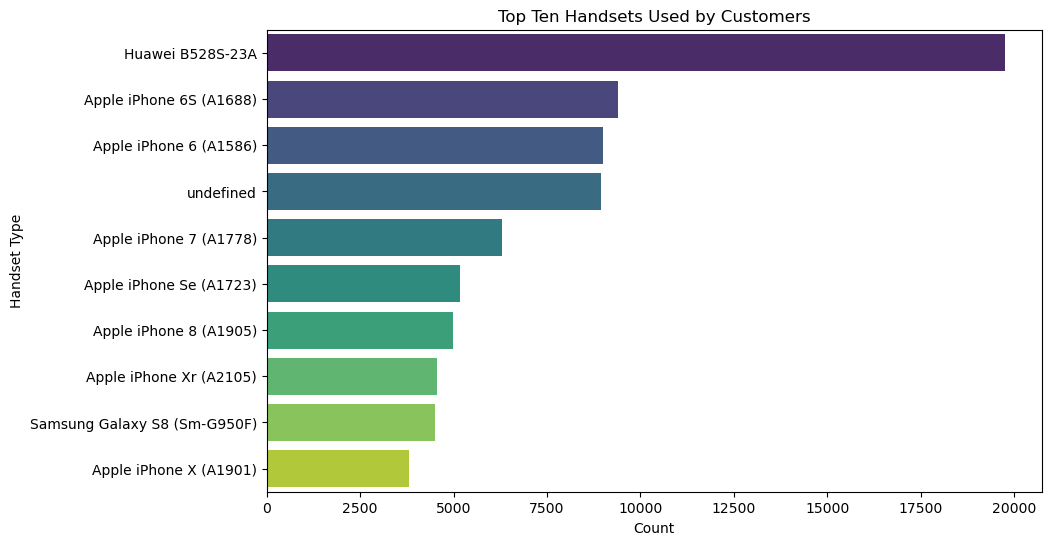

In [46]:
# Create a horizontal bar chart with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Handset Type', data=top_ten_handsets, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Handset Type')
plt.title('Top Ten Handsets Used by Customers')
plt.show();

In [47]:
# Extract relevant columns
handsetM_data = df_clean['Handset Manufacturer']

In [48]:
# Group by Handset Manufacturer and count occurrences
handsetM_counts = handsetM_data.value_counts().reset_index()

In [49]:
# Rename columns 
handsetM_counts.columns = ['Handset Manufacturer', 'Count']

 **Manufacturer Insights:**

In [50]:
# Select the top three handsets
top_three_handsets_manf = handsetM_counts.head(3)
top_three_handsets_manf

,Handset Manufacturer,Count
0,Apple,59405
1,Samsung,40652
2,Huawei,34326


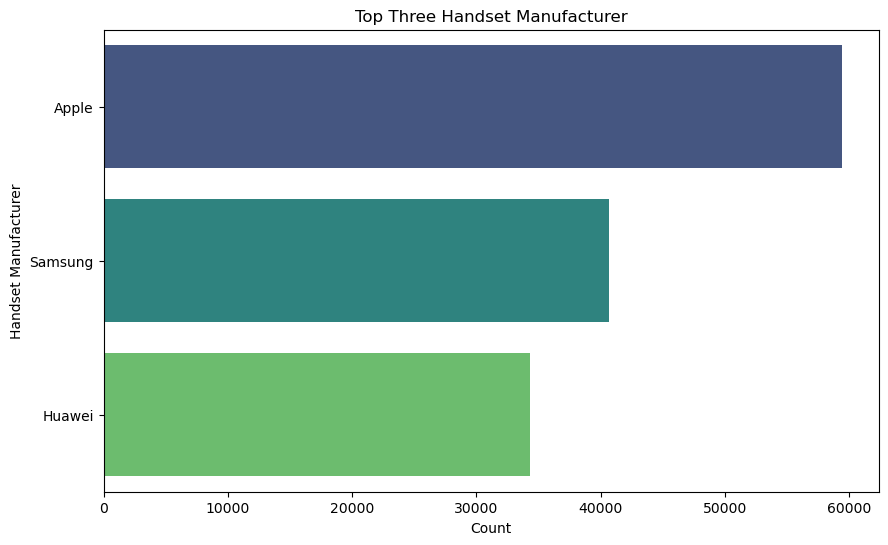

In [51]:
# Create a horizontal bar chart with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Handset Manufacturer', data=top_three_handsets_manf, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Handset Manufacturer')
plt.title('Top Three Handset Manufacturer')
plt.show();

In [52]:
# Group by 'Handset Manufacturer' and 'Handset Type' and count occurrences
handset_ocurrance_counts = df_clean.groupby(['Handset Manufacturer', 'Handset Type']).size().reset_index(name='Count')

In [53]:
# Get the top 3 handset manufacturers
top_manufacturers = handset_ocurrance_counts.groupby('Handset Manufacturer')['Count'].sum().nlargest(3).index

In [54]:
# Filter the DataFrame for the top 3 handset manufacturers
top_manufacturer_data = handset_ocurrance_counts[handset_ocurrance_counts['Handset Manufacturer'].isin(top_manufacturers)]

In [55]:
# Get the top 5 handsets for each top manufacturer
top_5_handsets_per_manufacturer = (
    top_manufacturer_data.groupby('Handset Manufacturer')
    .apply(lambda group: group.nlargest(5, 'Count'))
    .reset_index(drop=True)
)

# Display the result
top_5_handsets_per_manufacturer

,Handset Manufacturer,Handset Type,Count
0,Apple,Apple iPhone 6S (A1688),9397
1,Apple,Apple iPhone 6 (A1586),9002
2,Apple,Apple iPhone 7 (A1778),6296
3,Apple,Apple iPhone Se (A1723),5176
4,Apple,Apple iPhone 8 (A1905),4985
5,Huawei,Huawei B528S-23A,19749
6,Huawei,Huawei E5180,2078
7,Huawei,Huawei P20 Lite Huawei Nova 3E,2014
8,Huawei,Huawei P20,1476
9,Huawei,Huawei Y6 2018,987


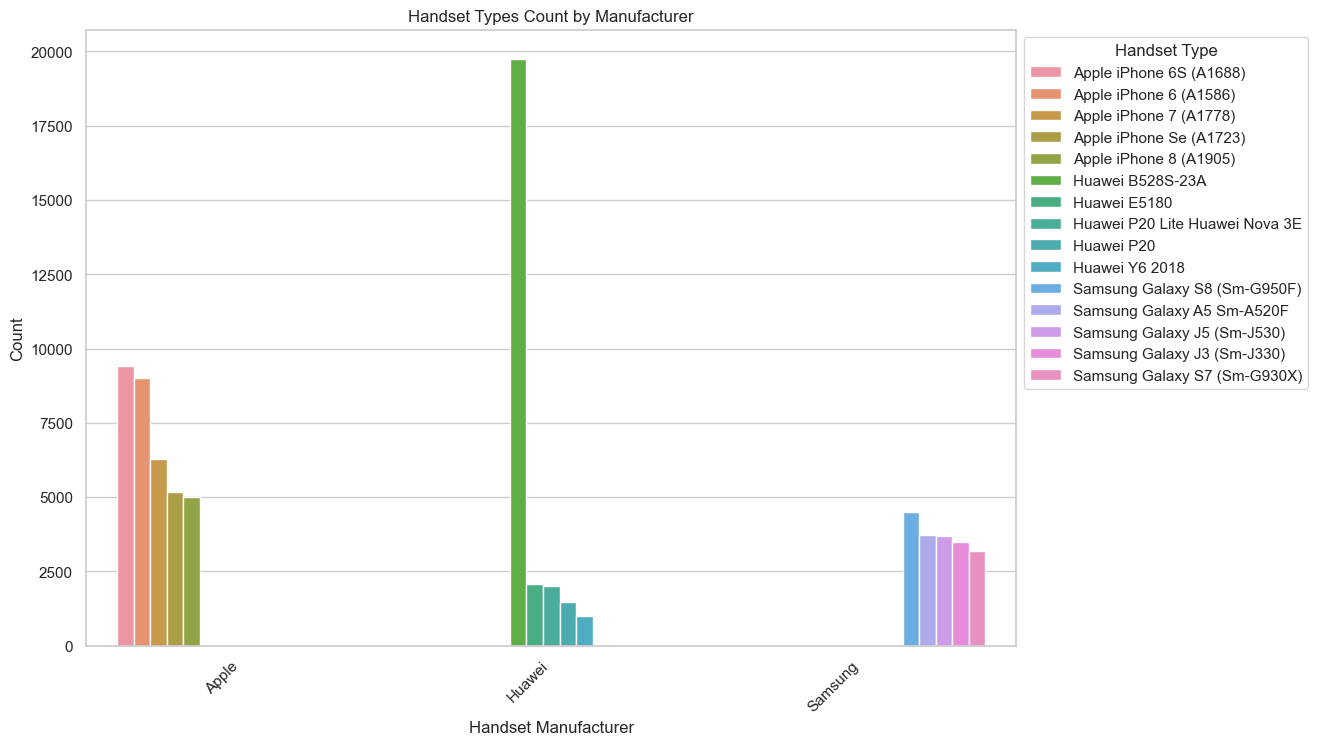

In [89]:
# Set the plotting style
sns.set(style="whitegrid")

# Create a grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Handset Manufacturer', y='Count', hue='Handset Type', data=top_5_handsets_per_manufacturer)
plt.title('Handset Types Count by Manufacturer')
plt.xlabel('Handset Manufacturer')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(title='Handset Type', bbox_to_anchor=(1, 1))  # Move legend to the right
plt.show()

### Interpretation:

**Marketing Strategy:**
<ul>
    <li>Consider joint marketing campaigns or exclusive offers</li>
    <li>Collaborate with popular handset manufacturers to leverage their brand influence.</li>
</ul>

**Task 2.1 - Overview of the users’ behaviour on those applications.**

- Aggregate per user the following information in the column  
    - number of xDR sessions
    - Session duration
    - the total download (DL) and upload (UL) data
    - the total data volume (in Bytes) during this session for each application


To answer the above quesion let start by choosing the the xDR(data channel) columns. 

In [56]:
# Display the list of column names
print(df_clean.columns.tolist())

['Bearer Id', 'Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email 

In [57]:
# List of columns to be aggregated 
columns_to_aggregate = ['Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)',
                         'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                         'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                         'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                         'Google DL (Bytes)', 'Google UL (Bytes)',
                         'Email DL (Bytes)', 'Email UL (Bytes)',
                         'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
                         'Other DL (Bytes)', 'Other UL (Bytes)']

In [58]:
# Group by 'MSISDN/Number' and count the number of xDR sessions
user_aggregated_data = df_clean.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',  # Number of xDR sessions
    'Dur. (ms)': 'sum',  # Session duration
    'Total DL (Bytes)': 'sum',  # Total download data
    'Total UL (Bytes)': 'sum',  # Total upload data
    'Social Media DL (Bytes)': 'sum', 'Social Media UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum', 'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum', 'Netflix UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum', 'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum', 'Email UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum', 'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum', 'Other UL (Bytes)': 'sum'
})


# Display the aggregated data
user_aggregated_data

,Bearer Id,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
MSISDN/Number,,,,,,,,,,,,,,,,,,
3.360100e+10,1,116720.00000,8.426375e+08,36053108.0,2206504.0,25631.0,14900201.0,6724347.0,10265105.0,16915876.0,3337123.0,1051882.0,837400.0,493962.0,8.110911e+08,1367528.0,377096990.0,9473882.0
3.360100e+10,1,181230.00000,1.207552e+08,36104459.0,2598548.0,62017.0,5324251.0,7107972.0,770569.0,10451194.0,4197697.0,1137166.0,2828821.0,478960.0,1.050353e+08,14714780.0,279557701.0,2152370.0
3.360100e+10,1,134969.00000,5.566597e+08,39306820.0,3148004.0,47619.0,2137272.0,19196298.0,16525919.0,2827981.0,3343483.0,99643.0,2436500.0,768880.0,5.290685e+08,9759228.0,495086501.0,6607171.0
3.360101e+10,1,49878.00000,4.019932e+08,20327526.0,251469.0,28825.0,4393123.0,2584198.0,1157362.0,784730.0,5937765.0,3740728.0,2178618.0,106052.0,3.880748e+08,3051292.0,25248001.0,10031701.0
3.360101e+10,2,37104.00000,1.363130e+09,94280527.0,2861230.0,51312.0,10339971.0,31193031.0,24971647.0,24230077.0,13728668.0,4770948.0,2247808.0,1057661.0,1.308981e+09,5816727.0,777643713.0,27160771.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.379000e+10,1,8810.00000,6.879252e+08,26716429.0,234320.0,65863.0,8294310.0,18353533.0,14754741.0,147797.0,6834178.0,697091.0,480946.0,525969.0,6.573267e+08,3034642.0,291391283.0,3891534.0
3.379000e+10,1,140988.00000,4.445751e+08,35732243.0,442214.0,56355.0,5596862.0,14254710.0,6929961.0,1601099.0,1472406.0,3957299.0,2513433.0,664.0,4.276202e+08,9383076.0,204636073.0,6479040.0
3.197021e+12,1,104608.43895,1.948281e+08,37295915.0,668596.0,46628.0,9839889.0,2120016.0,10340908.0,16251392.0,8572779.0,1865881.0,842279.0,678492.0,1.645636e+08,13485133.0,467678100.0,2848373.0


**Session duration**

In [59]:
user_aggregated_data['Session duration (s)'] = user_aggregated_data['Dur. (ms)'] / 1000

In [60]:
# check the change
user_aggregated_data.head()

,Bearer Id,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Session duration (s)
MSISDN/Number,,,,,,,,,,,,,,,,,,,
3.360100e+10,1,116720.0,8.426375e+08,36053108.0,2206504.0,25631.0,14900201.0,6724347.0,10265105.0,16915876.0,3337123.0,1051882.0,837400.0,493962.0,8.110911e+08,1367528.0,377096990.0,9473882.0,116.720
3.360100e+10,1,181230.0,1.207552e+08,36104459.0,2598548.0,62017.0,5324251.0,7107972.0,770569.0,10451194.0,4197697.0,1137166.0,2828821.0,478960.0,1.050353e+08,14714780.0,279557701.0,2152370.0,181.230
3.360100e+10,1,134969.0,5.566597e+08,39306820.0,3148004.0,47619.0,2137272.0,19196298.0,16525919.0,2827981.0,3343483.0,99643.0,2436500.0,768880.0,5.290685e+08,9759228.0,495086501.0,6607171.0,134.969
3.360101e+10,1,49878.0,4.019932e+08,20327526.0,251469.0,28825.0,4393123.0,2584198.0,1157362.0,784730.0,5937765.0,3740728.0,2178618.0,106052.0,3.880748e+08,3051292.0,25248001.0,10031701.0,49.878
3.360101e+10,2,37104.0,1.363130e+09,94280527.0,2861230.0,51312.0,10339971.0,31193031.0,24971647.0,24230077.0,13728668.0,4770948.0,2247808.0,1057661.0,1.308981e+09,5816727.0,777643713.0,27160771.0,37.104


In [61]:
# Calculate total data volume for each application in Byte
user_aggregated_data['Social Media Total (Bytes)'] = (
                                                        user_aggregated_data['Social Media DL (Bytes)']
                                                        + 
                                                        user_aggregated_data['Social Media UL (Bytes)']
                                                )
user_aggregated_data['Youtube Total (Bytes)'] = (
                                                        user_aggregated_data['Youtube DL (Bytes)']
                                                        + 
                                                        user_aggregated_data['Youtube UL (Bytes)']
                                                )
user_aggregated_data['Netflix Total (Bytes)'] = (
                                                        user_aggregated_data['Netflix DL (Bytes)']
                                                        + 
                                                        user_aggregated_data['Netflix UL (Bytes)']
                                                )
user_aggregated_data['Google Total (Bytes)'] = (
                                                        user_aggregated_data['Google DL (Bytes)'] 
                                                        + 
                                                        user_aggregated_data['Google UL (Bytes)']
                                                )
user_aggregated_data['Email Total (Bytes)'] = (
                                                        user_aggregated_data['Email DL (Bytes)']
                                                        + 
                                                        user_aggregated_data['Email UL (Bytes)']
                                                )
user_aggregated_data['Gaming Total (Bytes)'] = (
                                                        user_aggregated_data['Gaming DL (Bytes)']
                                                        + 
                                                        user_aggregated_data['Gaming UL (Bytes)']
                                                )
user_aggregated_data['Other Total (Bytes)'] = (
                                                        user_aggregated_data['Other DL (Bytes)']
                                                        + 
                                                        user_aggregated_data['Other UL (Bytes)']
                                                        )

In [62]:
# check the change
user_aggregated_data.head()

,Bearer Id,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),...,Other DL (Bytes),Other UL (Bytes),Session duration (s),Social Media Total (Bytes),Youtube Total (Bytes),Netflix Total (Bytes),Google Total (Bytes),Email Total (Bytes),Gaming Total (Bytes),Other Total (Bytes)
MSISDN/Number,,,,,,,,,,,,,,,,,,,,,
3.360100e+10,1,116720.0,8.426375e+08,36053108.0,2206504.0,25631.0,14900201.0,6724347.0,10265105.0,16915876.0,...,377096990.0,9473882.0,116.720,2232135.0,21624548.0,27180981.0,4389005.0,1331362.0,8.124587e+08,386570872.0
3.360100e+10,1,181230.0,1.207552e+08,36104459.0,2598548.0,62017.0,5324251.0,7107972.0,770569.0,10451194.0,...,279557701.0,2152370.0,181.230,2660565.0,12432223.0,11221763.0,5334863.0,3307781.0,1.197501e+08,281710071.0
3.360100e+10,1,134969.0,5.566597e+08,39306820.0,3148004.0,47619.0,2137272.0,19196298.0,16525919.0,2827981.0,...,495086501.0,6607171.0,134.969,3195623.0,21333570.0,19353900.0,3443126.0,3205380.0,5.388277e+08,501693672.0
3.360101e+10,1,49878.0,4.019932e+08,20327526.0,251469.0,28825.0,4393123.0,2584198.0,1157362.0,784730.0,...,25248001.0,10031701.0,49.878,280294.0,6977321.0,1942092.0,9678493.0,2284670.0,3.911261e+08,35279702.0
3.360101e+10,2,37104.0,1.363130e+09,94280527.0,2861230.0,51312.0,10339971.0,31193031.0,24971647.0,24230077.0,...,777643713.0,27160771.0,37.104,2912542.0,41533002.0,49201724.0,18499616.0,3305469.0,1.314798e+09,804804484.0


In [63]:
user_aggregated_data.describe()

,Bearer Id,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),...,Other DL (Bytes),Other UL (Bytes),Session duration (s),Social Media Total (Bytes),Youtube Total (Bytes),Netflix Total (Bytes),Google Total (Bytes),Email Total (Bytes),Gaming Total (Bytes),Other Total (Bytes)
count,106352.000000,1.063520e+05,1.063520e+05,1.063520e+05,1.063520e+05,1.063520e+05,1.063520e+05,1.063520e+05,1.063520e+05,1.063520e+05,...,1.063520e+05,1.063520e+05,106352.000000,1.063520e+05,1.063520e+05,1.063520e+05,1.063520e+05,1.063520e+05,1.063520e+05,1.063520e+05
mean,1.399475,1.347520e+05,6.363724e+08,5.755017e+07,2.512357e+06,4.607809e+04,1.628093e+07,1.540744e+07,1.627045e+07,1.539785e+07,...,5.893937e+08,1.156429e+07,134.751984,2.558435e+06,3.168837e+07,3.166831e+07,1.092685e+07,3.161360e+06,6.023553e+08,6.009580e+08
std,1.707035,1.482298e+05,8.349218e+08,7.253285e+07,3.319655e+06,6.157909e+04,2.106992e+07,2.053917e+07,2.089540e+07,2.050150e+07,...,7.697347e+08,1.535647e+07,148.229757,3.373136e+06,4.015242e+07,3.992539e+07,1.392759e+07,4.010321e+06,7.972018e+08,7.830401e+08
min,1.000000,7.142000e+03,8.827082e+06,7.324119e+06,1.200000e+01,0.000000e+00,5.300000e+01,1.060000e+02,4.200000e+01,3.500000e+01,...,3.290000e+03,1.560000e+02,7.142000,1.563000e+03,7.890300e+04,1.845690e+05,4.033000e+04,1.817600e+04,3.063580e+05,1.490450e+05
25%,1.000000,7.272950e+04,3.150771e+08,3.640823e+07,1.176456e+06,2.161150e+04,7.654169e+06,7.251176e+06,7.599646e+06,7.217812e+06,...,2.771717e+08,5.464247e+06,72.729500,1.211844e+06,1.863875e+07,1.857012e+07,5.945850e+06,1.675368e+06,2.883167e+08,2.858754e+08
50%,1.000000,1.014910e+05,5.707875e+08,4.681475e+07,2.267018e+06,4.159550e+04,1.461629e+07,1.388335e+07,1.464656e+07,1.389070e+07,...,5.303150e+08,1.038277e+07,101.491000,2.305819e+06,2.681882e+07,2.673097e+07,9.592466e+06,2.801230e+06,5.428544e+08,5.401908e+08
75%,2.000000,1.727980e+05,8.078812e+08,6.585210e+07,3.269070e+06,5.995250e+04,2.114109e+07,1.998651e+07,2.114251e+07,2.002017e+07,...,7.657103e+08,1.503606e+07,172.798000,3.309229e+06,3.796137e+07,3.800369e+07,1.322423e+07,3.849221e+06,7.777507e+08,7.756874e+08
max,492.000000,3.158071e+07,2.267761e+11,2.065267e+10,8.929168e+08,1.662721e+07,5.587592e+09,5.541941e+09,5.518408e+09,5.524747e+09,...,2.056281e+11,4.135221e+09,31580.714210,9.095440e+08,1.112953e+10,1.104315e+10,3.827409e+09,1.091379e+09,2.152925e+11,2.097633e+11


- Count: double check missing values.
- Mean (average): identify the centeral position with the dataset.
- std (standard deviation): identify the spread of the data, making it easier to detect outliers..
- min (minimum): The smallest value in each column.
- 25% (1st quartile or Q1): The value below which 25% of the data falls.
- 50% (median or 2nd quartile or Q2): The middle value of the dataset.
- 75% (3rd quartile or Q3): The value below which 75% of the data falls.
- max (maximum): The largest value in each column


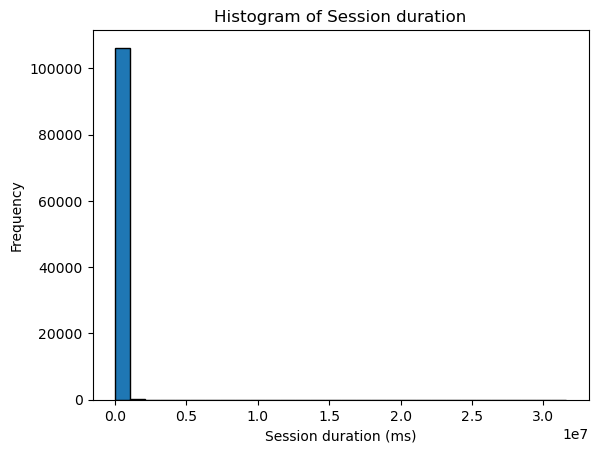

In [64]:
# Plot histogram for 'Session duration'
plt.hist(user_aggregated_data['Session duration (s)'], bins=30, edgecolor='black')
plt.title('Histogram of Session duration')
plt.xlabel('Session duration (ms)')
plt.ylabel('Frequency')
plt.show()


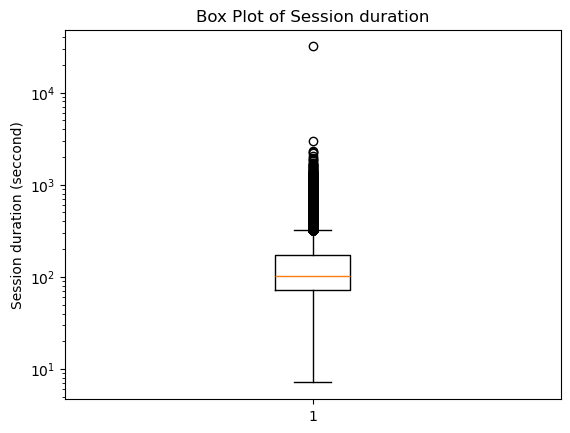

In [87]:
# Create a figure and axis
fig, ax = plt.subplots()
# Plot box plot for 'Session duration' with logarithmic scale on the y-axis
ax.boxplot(user_aggregated_data['Session duration (s)'])
ax.set_yscale('log')  # Set logarithmic scale on the y-axis
ax.set_title('Box Plot of Session duration')
ax.set_ylabel('Session duration (seccond)')
plt.show()
